# How the DataSUS sample dataset was obtained

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kuka
import os

from dbfread import DBF

# Import data

1. The compressed database files (type ".dbc") were obtained directly from the [DataSUS - File Transfer](https://datasus.saude.gov.br/transferencia-de-arquivos/) website.

2. The unpacking was performed using the Tabwin software with the "COMPRIME/EXPANDE .DBF" option. The software is also available at [DataSUS - File Transfer](https://datasus.saude.gov.br/transferencia-de-arquivos/) too.

3. Next, you will use `dbfread` to convert to DataFrame.

> I did this for the years 2013 to June 2025 and put the `.dbc`, `.dbf`, and `./CNV` files in a folder called `./data`.

In [2]:
# 2013 - 2025 databases names:
files = ['POBR2013', 'POBR2014',
        'POBR2015', 'POBR2016',
        'POBR2017', 'POBR2018', 
        'POBR2019', 'POBR2020',
        'POBR2021', 'POBR2022',
        'POBR2023', 'POBR2024',
        'POBR2025']
def pathnamePO(name):
    return f'./data/{name}.dbf'

Let's see the length of the databases:

POBR2013 DataFrame shape =  (180644, 23)
POBR2014 DataFrame shape =  (180190, 23)
POBR2015 DataFrame shape =  (182978, 23)
POBR2016 DataFrame shape =  (188587, 23)
POBR2017 DataFrame shape =  (195548, 23)
POBR2018 DataFrame shape =  (351510, 23)
POBR2019 DataFrame shape =  (564292, 23)
POBR2020 DataFrame shape =  (509434, 23)
POBR2021 DataFrame shape =  (572179, 23)
POBR2022 DataFrame shape =  (633843, 23)
POBR2023 DataFrame shape =  (675739, 23)
POBR2024 DataFrame shape =  (618297, 23)
POBR2025 DataFrame shape =  (123624, 23)


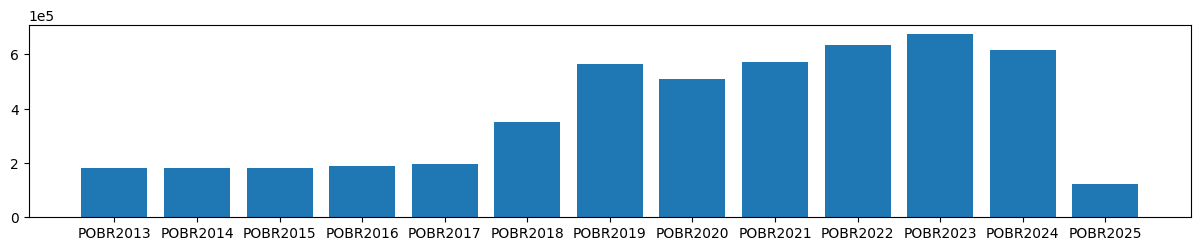

In [3]:
from matplotlib.ticker import ScalarFormatter

x_plot = []
y_plot = []
for file in files:
    df = pd.DataFrame(iter(DBF(pathnamePO(file), encoding="latin-1") ))
    x_plot.append(file)
    y_plot.append(df.shape[0])
    print(f'{file} DataFrame shape = ',df.shape)

fig, ax = plt.subplots(figsize=( 15, 2.5 ))
ax.bar(x_plot, y_plot)

formatter = ScalarFormatter(useOffset=True)
formatter.set_powerlimits((5,5))  # Força usar ×10^5
ax.yaxis.set_major_formatter(formatter)

There's a lot of data. It'll be about 700 MB in a traditional ".csv" file. So let's **just take 20%** of it to  export to kaggle:

In [4]:
data = pd.DataFrame()
for file in files:
    df = pd.DataFrame(iter(DBF(pathnamePO(file), encoding="latin-1") ))
    df = df.sample( frac=0.2, random_state=42)
    data = pd.concat([data, df], ignore_index=True)

In [5]:
data

,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,UF_DIAGN,MUN_DIAG,...,SEXO,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC
0,2013,201304,2014,201401,35,354100,35,354850,35,354850,...,F,2,2079720,2079720,+0268,,C50,11/04/2013,04/01/2014,03/07/1963
1,2013,201306,2013,201309,43,430090,43,430700,43,430700,...,M,1,2707918,2707918,+0092,,C20,17/06/2013,17/09/2013,28/10/1958
2,2013,201308,2013,201310,35,355030,35,355030,35,355030,...,F,0,2078287,2080575,+0063,,C50,20/08/2013,22/10/2013,01/06/1961
3,2013,201303,2013,201303,26,261160,26,261160,26,261160,...,F,5,0000582,0000582,-0015,,C54,22/03/2013,07/03/2013,02/07/1960
4,2013,201304,2013,201304,42,420450,42,420910,42,420910,...,M,,2436469,2436469,+0003,,C91,09/04/2013,12/04/2013,10/07/1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995369,2025,202503,,,52,522045,,,52,522045,...,F,9,2769646,,99999,,D01,28/03/2025,,12/11/1977
995370,2025,202502,,,23,230763,,,23,230440,...,F,9,2723220,,99999,,C80,14/02/2025,,29/12/1940
995371,2025,202501,2025,202502,31,314930,31,310620,31,310620,...,F,2,0026972,2695324,+0020,,C53,14/01/2025,03/02/2025,18/10/1988
995372,2025,202501,,,35,352050,,,35,352050,...,F,9,2784602,,99999,,C80,08/01/2025,,16/11/1957


Let's replace the missing values from `''` to `np.nan`

In [6]:
data.replace('', np.nan, inplace=True)

C:\Users\Lhucas Tenorio\AppData\Local\Temp\ipykernel_18820\3231110069.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('', np.nan, inplace=True)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995374 entries, 0 to 995373
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ANO_DIAGN   995374 non-null  object 
 1   ANOMES_DIA  995374 non-null  object 
 2   ANO_TRATAM  583946 non-null  object 
 3   ANOMES_TRA  583946 non-null  object 
 4   UF_RESID    995374 non-null  object 
 5   MUN_RESID   995374 non-null  object 
 6   UF_TRATAM   583946 non-null  object 
 7   MUN_TRATAM  583946 non-null  object 
 8   UF_DIAGN    995374 non-null  object 
 9   MUN_DIAG    995374 non-null  object 
 10  TRATAMENTO  995374 non-null  object 
 11  DIAGNOSTIC  995374 non-null  object 
 12  IDADE       995374 non-null  object 
 13  SEXO        995374 non-null  object 
 14  ESTADIAM    928497 non-null  object 
 15  CNES_DIAG   995374 non-null  object 
 16  CNES_TRAT   583946 non-null  object 
 17  TEMPO_TRAT  966046 non-null  object 
 18  CNS_PAC     0 non-null       float64
 19  DI

Let's define the type of columns according to their data structure:

In [8]:
column_types = {
    'ANO_DIAGN': 'int32',
    'ANOMES_DIA': 'object',
    'ANO_TRATAM': 'float32',
    'ANOMES_TRA': 'object',
    'UF_RESID': 'object',
    'MUN_RESID': 'object',
    'UF_TRATAM': 'object',
    'MUN_TRATAM': 'object',
    'UF_DIAGN': 'object',
    'MUN_DIAG': 'object',
    'TRATAMENTO': 'object',
    'DIAGNOSTIC': 'object',
    'IDADE': 'int32',
    'SEXO': 'object',
    'ESTADIAM': 'object',
    'CNES_DIAG': 'object',
    'CNES_TRAT': 'object',
    'TEMPO_TRAT': 'float32',
    'CNS_PAC': 'object',
    'DIAG_DETH': 'object',
    'DT_DIAG': 'datetime64[ns]',
    'DT_TRAT': 'datetime64[ns]',
    'DT_NASC': 'datetime64[ns]',
}
for col in data.columns:
    data[col] = data[col].astype(column_types[col])

In [9]:
data.head()

,ANO_DIAGN,ANOMES_DIA,ANO_TRATAM,ANOMES_TRA,UF_RESID,MUN_RESID,UF_TRATAM,MUN_TRATAM,UF_DIAGN,MUN_DIAG,...,SEXO,ESTADIAM,CNES_DIAG,CNES_TRAT,TEMPO_TRAT,CNS_PAC,DIAG_DETH,DT_DIAG,DT_TRAT,DT_NASC
0,2013,201304,2014.0,201401,35,354100,35,354850,35,354850,...,F,2,2079720,2079720,268.0,NaN,C50,2013-11-04,2014-04-01,1963-03-07
1,2013,201306,2013.0,201309,43,430090,43,430700,43,430700,...,M,1,2707918,2707918,92.0,NaN,C20,2013-06-17,2013-09-17,1958-10-28
2,2013,201308,2013.0,201310,35,355030,35,355030,35,355030,...,F,0,2078287,2080575,63.0,NaN,C50,2013-08-20,2013-10-22,1961-01-06
3,2013,201303,2013.0,201303,26,261160,26,261160,26,261160,...,F,5,0000582,0000582,-15.0,NaN,C54,2013-03-22,2013-07-03,1960-02-07
4,2013,201304,2013.0,201304,42,420450,42,420910,42,420910,...,M,NaN,2436469,2436469,3.0,NaN,C91,2013-09-04,2013-12-04,1988-10-07


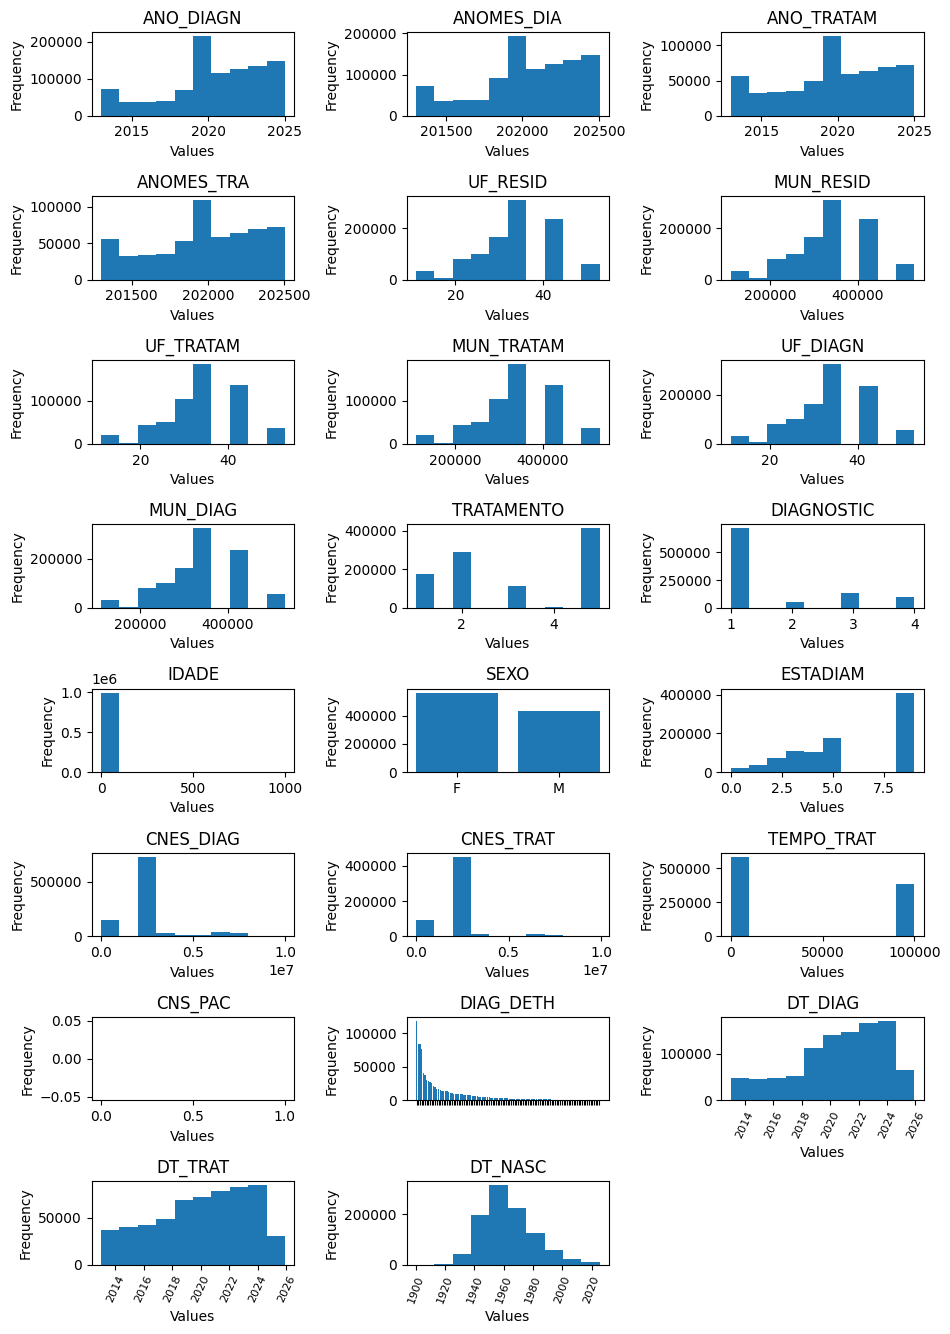

In [10]:
kuka.eda.plot_columns_dist(data);

Export data:

In [ ]:
data.to_csv('./data/oncological_panel_datasus.csv')

## creates a dictionary for the encoded values

Some columns have coded values ​​(IDs) for the UF, diagnoses, etc.

In the "CNV" file (created by the DataSUS), the ".def" file needs to contain information about the relationship between the IDs and the real values.

Check the ".def" original file:

In [12]:
with open('./data/CNV/PAINEL_ONCOLOGIA_ORIGINAL.DEF', 'r', encoding='latin1') as f:
    for line in f:
        print(line.strip())

;Painel-Oncologia - BRASIL
A.\dados\PO*.DBC

XRegião de tratamento,         MUN_TRATAM    , 1, BR_REGIAO.CNV
XUF do tratamento,             UF_TRATAM     , 1, BR_UF.CNV
XRegião de Saúde do tratament, MUN_TRATAM    , 1, BR_REGSAUD.CNV
LMunicípio do tratamento,      MUN_TRATAM    , 1, BR_MUNICIP.CNV
SMunicípio do tratamento,      MUN_TRATAM    , 1, BR_MUNICIP.CNV
XRegião de residência,         MUN_RESID     , 1, BR_REGIAO.CNV
XUF da residência,             UF_RESID      , 1, BR_UF.CNV
XRegião de Saúde da residência,MUN_RESID     , 1, BR_REGSAUD.CNV
LMunicípio  da residência,     MUN_RESID     , 1, BR_MUNICIP.CNV
SMunicípio  da residência,     MUN_RESID     , 1, BR_MUNICIP.CNV
XSexo,                         SEXO          , 1, SEXO.CNV
XIdade,                        IDADE         , 1, IDADE.CNV
XFaixa etária,                 IDADE         , 1, FAIXA_ETARIA.CNV
XAno do diagnóstico,           ANO_DIAGN     , 1, ANO_DIAGNOSTICO.CNV
XMês/Ano do diagnóstico,       ANOMES_DIA    , 1, PERIODO_DIA

We need to create a ".def" file in a different format, where each line describes the column and its code-relationship file.

Check out the new ".def" file created from df.columns:

In [13]:
df.columns

Index(['ANO_DIAGN', 'ANOMES_DIA', 'ANO_TRATAM', 'ANOMES_TRA', 'UF_RESID',
       'MUN_RESID', 'UF_TRATAM', 'MUN_TRATAM', 'UF_DIAGN', 'MUN_DIAG',
       'TRATAMENTO', 'DIAGNOSTIC', 'IDADE', 'SEXO', 'ESTADIAM', 'CNES_DIAG',
       'CNES_TRAT', 'TEMPO_TRAT', 'CNS_PAC', 'DIAG_DETH', 'DT_DIAG', 'DT_TRAT',
       'DT_NASC'],
      dtype='object')

In [14]:
# Check the ".def" home-made file
with open('./data/CNV/painel_oncologia.def', 'r', encoding='latin1') as f:
    for line in f:
        print(line.strip())

XMês/Ano do diagnóstico,       ANOMES_DIA    , 1, PERIODO_DIAGNOSTICO.CNV
XMês/Ano do tratamento,        ANOMES_TRA    , 1, PERIODO_TRATAMENTO.CNV
XUF da residência,             UF_RESID      , 1, BR_UF.CNV
LMunicípio  da residência,     MUN_RESID     , 1, BR_MUNICIP.CNV
XUF do tratamento,             UF_TRATAM     , 1, BR_UF.CNV
LMunicípio do tratamento,      MUN_TRATAM    , 1, BR_MUNICIP.CNV
XUF do diagnóstico,            UF_DIAGN      , 1, BR_UF.CNV
LMunicípio do diagnóstico,     MUN_DIAG      , 1, BR_MUNICIP.CNV
XModalidade Terapêutica,       TRATAMENTO    , 1, TP_TRATAMENTO.CNV
Xdiagnóstico,                  DIAGNOSTIC    , 1, DIAGNOSTICO_AGR.CNV
XIdade,                        IDADE         , 1, IDADE.CNV
XSexo,                         SEXO          , 1, SEXO.CNV
XEstadiamento,                 ESTADIAM      , 1, ESTADIAMENTO.CNV
XEstabelecimento diagnóstico,  CNES_DIAG     , 1, CNES_DIAGNOSTICO.CNV
XEstabelecimento de tratamento,CNES_TRAT     , 1, CNES_TRATAMENTO.CNV
XTempo Tratam

Creating de dictionary:

In [15]:
def_file_dict = {}
with open('./data/CNV/painel_oncologia.def', 'r', encoding='latin1') as f:
    for i, line in enumerate(f):
            l = line.split(',')
            def_file_dict[ l[1].strip() ] = l[3].strip().lower()

def_file_dict

{'ANOMES_DIA': 'periodo_diagnostico.cnv',
 'ANOMES_TRA': 'periodo_tratamento.cnv',
 'UF_RESID': 'br_uf.cnv',
 'MUN_RESID': 'br_municip.cnv',
 'UF_TRATAM': 'br_uf.cnv',
 'MUN_TRATAM': 'br_municip.cnv',
 'UF_DIAGN': 'br_uf.cnv',
 'MUN_DIAG': 'br_municip.cnv',
 'TRATAMENTO': 'tp_tratamento.cnv',
 'DIAGNOSTIC': 'diagnostico_agr.cnv',
 'IDADE': 'idade.cnv',
 'SEXO': 'sexo.cnv',
 'ESTADIAM': 'estadiamento.cnv',
 'CNES_DIAG': 'cnes_diagnostico.cnv',
 'CNES_TRAT': 'cnes_tratamento.cnv',
 'TEMPO_TRAT': 'tempo_trat_detalhe.cnv',
 'DIAG_DETH': 'diagnostico.cnv'}

***Not all encoded columns will need the ".cnv" file to become readable. Remove the columns that we can extract the information from without the ".cnv" file.***

In [16]:
def_file_dict.pop('ANOMES_DIA')
def_file_dict.pop('ANOMES_TRA')
def_file_dict.pop('IDADE')
def_file_dict.pop('SEXO')
def_file_dict.pop('TEMPO_TRAT')
def_file_dict

{'UF_RESID': 'br_uf.cnv',
 'MUN_RESID': 'br_municip.cnv',
 'UF_TRATAM': 'br_uf.cnv',
 'MUN_TRATAM': 'br_municip.cnv',
 'UF_DIAGN': 'br_uf.cnv',
 'MUN_DIAG': 'br_municip.cnv',
 'TRATAMENTO': 'tp_tratamento.cnv',
 'DIAGNOSTIC': 'diagnostico_agr.cnv',
 'ESTADIAM': 'estadiamento.cnv',
 'CNES_DIAG': 'cnes_diagnostico.cnv',
 'CNES_TRAT': 'cnes_tratamento.cnv',
 'DIAG_DETH': 'diagnostico.cnv'}

Finaly, create the dictionaries:

In [17]:
code_dict = {}
for col, file in def_file_dict.items():
    code_dict[col] = {}
    with open(f'./data/CNV/{file}', 'r', encoding='latin1') as f:
        for i, line in enumerate(f):
            
            if i>0:
                line_s = line.split()
                key = ' '.join(line_s[1:-1])
                value = line_s[-1].split(',')
                code_dict[col][key] = value

In [18]:
code_dict

{'UF_RESID': {'11 Rondônia': ['11'],
  '12 Acre': ['12'],
  '13 Amazonas': ['13'],
  '14 Roraima': ['14'],
  '15 Pará': ['15'],
  '16 Amapá': ['16'],
  '17 Tocantins': ['17'],
  '21 Maranhão': ['21'],
  '22 Piauí': ['22'],
  '23 Ceará': ['23'],
  '24 Rio Grande do Norte': ['24'],
  '25 Paraíba': ['25'],
  '26 Pernambuco': ['26', '20'],
  '27 Alagoas': ['27'],
  '28 Sergipe': ['28'],
  '29 Bahia': ['29'],
  '31 Minas Gerais': ['31'],
  '32 Espírito Santo': ['32'],
  '33 Rio de Janeiro': ['33'],
  '35 São Paulo': ['35'],
  '41 Paraná': ['41'],
  '42 Santa Catarina': ['42'],
  '43 Rio Grande do Sul': ['43'],
  '50 Mato Grosso do Sul': ['50'],
  '51 Mato Grosso': ['51'],
  '52 Goiás': ['52'],
  '53 Distrito Federal': ['53'],
  '00 Ignorado/exterior': ['00']},
 'MUN_RESID': {"110001 Alta Floresta D'Oeste": ['110001'],
  '110037 Alto Alegre dos Parecis': ['110037'],
  '110040 Alto Paraíso': ['110040'],
  "110034 Alvorada D'Oeste": ['110034'],
  '110002 Ariquemes': ['110002'],
  '110045 Burit

Export the dict as a pickle file:

In [ ]:
kuka.utils.export_pkl(code_dict, './data/oncological_panel_datasus_coldict.pkl')

Exported variable: <class 'dict'>


For import this file, execute the code:

```python
import pickle
with open( 'example_file.pkl', 'rb' ) as f:
  variable = pickle.load( f )
```

```
█████   █████  ███                                        █████████  █████  █████  █████████  ███
░░███   ░░███  ░░░                                        ███░░░░░███░░███  ░░███  ███░░░░░███░███
 ░███    ░███  ████  █████ █████  ██████       ██████    ░███    ░░░  ░███   ░███ ░███    ░░░ ░███
 ░███    ░███ ░░███ ░░███ ░░███  ░░░░░███     ███░░███   ░░█████████  ░███   ░███ ░░█████████ ░███
 ░░███   ███   ░███  ░███  ░███   ███████    ░███ ░███    ░░░░░░░░███ ░███   ░███  ░░░░░░░░███░███
  ░░░█████░    ░███  ░░███ ███   ███░░███    ░███ ░███    ███    ░███ ░███   ░███  ███    ░███░░░ 
    ░░███      █████  ░░█████   ░░████████   ░░██████    ░░█████████  ░░████████  ░░█████████  ███
     ░░░      ░░░░░    ░░░░░     ░░░░░░░░     ░░░░░░      ░░░░░░░░░    ░░░░░░░░    ░░░░░░░░░  ░░░
```